# Deep Learning Project #1

### Import Libraries

In [52]:
%matplotlib inline
import matplotlib.pylab as plt

import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier 
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
import category_encoders as ce
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

## Import of the datasets

### Import the datasets as train, test and extra sets.

We take a first glance at the information

In [3]:
#Importing the data
test_df = pd.read_csv('mimic_test_death.csv')
train_df = pd.read_csv('mimic_train.csv')
extra_df = pd.read_csv('MIMIC_diagnoses.csv')

#Copy the data to avoid modifying the original.
train_df1 = train_df.copy()
test_df1 = test_df.copy()  
extra_df1 = extra_df.copy() 

print('Columns in our dataset: \n',train_df1.columns)

pd.set_option('display.max_columns', None)
train_df1.head(15)

Columns in our dataset: 
 Index(['HOSPITAL_EXPIRE_FLAG', 'subject_id', 'hadm_id', 'icustay_id',
       'HeartRate_Min', 'HeartRate_Max', 'HeartRate_Mean', 'SysBP_Min',
       'SysBP_Max', 'SysBP_Mean', 'DiasBP_Min', 'DiasBP_Max', 'DiasBP_Mean',
       'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean', 'RespRate_Min',
       'RespRate_Max', 'RespRate_Mean', 'TempC_Min', 'TempC_Max', 'TempC_Mean',
       'SpO2_Min', 'SpO2_Max', 'SpO2_Mean', 'Glucose_Min', 'Glucose_Max',
       'Glucose_Mean', 'GENDER', 'DOB', 'DOD', 'ADMITTIME', 'DISCHTIME',
       'DEATHTIME', 'Diff', 'ADMISSION_TYPE', 'INSURANCE', 'RELIGION',
       'MARITAL_STATUS', 'ETHNICITY', 'DIAGNOSIS', 'ICD9_diagnosis',
       'FIRST_CAREUNIT', 'LOS'],
      dtype='object')


,HOSPITAL_EXPIRE_FLAG,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,DiasBP_Min,DiasBP_Max,DiasBP_Mean,MeanBP_Min,MeanBP_Max,MeanBP_Mean,RespRate_Min,RespRate_Max,RespRate_Mean,TempC_Min,TempC_Max,TempC_Mean,SpO2_Min,SpO2_Max,SpO2_Mean,Glucose_Min,Glucose_Max,Glucose_Mean,GENDER,DOB,DOD,ADMITTIME,DISCHTIME,DEATHTIME,Diff,ADMISSION_TYPE,INSURANCE,RELIGION,MARITAL_STATUS,ETHNICITY,DIAGNOSIS,ICD9_diagnosis,FIRST_CAREUNIT,LOS
0,0,55440,195768,228357,89.0,145.0,121.043478,74.0,127.0,106.586957,42.0,90.0,61.173913,59.0,94.0,74.543478,15.0,30.0,22.347826,35.111111,36.944444,36.080247,90.0,99.0,95.739130,111.0,230.0,160.777778,F,2108-07-16 00:00:00,2180-03-09 00:00:00,2178-02-06 10:35:00,2178-02-13 18:30:00,NaN,-61961.78470,EMERGENCY,Medicare,PROTESTANT QUAKER,SINGLE,WHITE,GASTROINTESTINAL BLEED,5789,MICU,4.5761
1,0,76908,126136,221004,63.0,110.0,79.117647,89.0,121.0,106.733333,49.0,74.0,64.733333,58.0,84.0,74.800000,13.0,21.0,16.058824,36.333333,36.611111,36.472222,98.0,100.0,99.058824,103.0,103.0,103.000000,F,2087-01-16 00:00:00,NaN,2129-02-12 22:34:00,2129-02-13 16:20:00,NaN,-43146.18378,EMERGENCY,Private,UNOBTAINABLE,MARRIED,WHITE,ESOPHAGEAL FOOD IMPACTION,53013,MICU,0.7582
2,0,95798,136645,296315,81.0,98.0,91.689655,88.0,138.0,112.785714,45.0,67.0,56.821429,64.0,88.0,72.888889,13.0,21.0,15.900000,36.444444,36.888889,36.666667,100.0,100.0,100.000000,132.0,346.0,217.636364,F,2057-09-17 00:00:00,NaN,2125-11-17 23:04:00,2125-12-05 17:55:00,NaN,-42009.96157,EMERGENCY,Medicare,PROTESTANT QUAKER,SEPARATED,BLACK/AFRICAN AMERICAN,UPPER GI BLEED,56983,MICU,3.7626
3,0,40708,102505,245557,76.0,128.0,98.857143,84.0,135.0,106.972973,30.0,89.0,41.864865,48.0,94.0,62.783784,12.0,35.0,26.771429,36.333333,39.500000,37.833333,78.0,100.0,95.085714,108.0,139.0,125.000000,F,2056-02-27 00:00:00,2132-03-01 00:00:00,2131-01-26 08:00:00,2131-02-05 16:23:00,NaN,-43585.37922,ELECTIVE,Medicare,NOT SPECIFIED,WIDOWED,WHITE,HIATAL HERNIA/SDA,5533,SICU,3.8734
4,0,28424,127337,225281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.0,137.0,113.000000,F,2066-12-19 00:00:00,2147-01-18 00:00:00,2146-05-04 02:02:00,2146-05-20 18:40:00,NaN,-50271.76602,EMERGENCY,Medicare,JEWISH,WIDOWED,WHITE,ABDOMINAL PAIN,56211,TSICU,5.8654
5,0,63311,180102,287519,70.0,130.0,97.951220,107.0,155.0,128.414634,60.0,88.0,74.780488,72.0,100.0,86.820513,10.0,23.0,15.707317,36.000000,36.944444,36.591270,96.0,100.0,98.878049,92.0,142.0,104.400000,M,2102-06-04 00:00:00,NaN,2151-08-06 19:11:00,2151-08-09 17:09:00,NaN,-51044.77754,EMERGENCY,Private,CATHOLIC,SINGLE,WHITE,LARGE GASTOINTESTINAL BLEED,5550,MICU,1.8490
6,0,82377,134854,231164,64.0,116.0,87.448276,104.0,148.0,122.100000,49.0,72.0,56.400000,69.0,92.0,78.793103,12.0,24.0,15.909091,35.222222,38.333333,36.801587,94.0,100.0,98.413793,102.0,204.0,163.666667,M,2107-03-27 00:00:00,NaN,2176-01-18 02:05:00,2176-01-26 15:00:00,NaN,-59706.62840,EMERGENCY,Medicare,OTHER,MARRIED,WHITE,ABDOMINAL PAIN,5513,TSICU,4.3669
7,0,86233,184606,237514,62.0,100.0,82.862069,62.0,154.0,114.642857,34.0,113.0,56.964286,48.0,122.0,72.750000,11.0,26.0,18.878788,36.111111,37.722222,36.907407,87.0,100.0,96.931034,116.0,183.0,142.166667,F,2103-11-21 00:00:00,NaN,2177-11-26 08:00:00,2177-12-10 15:45:00,NaN,-61550.06567,ELECTIVE,Medicare,PROTESTANT QUAKER,MARRIED,WHITE,LEFT LUNG CANCER/SDA,1625,SICU,9.8213
8,0,53787,174772,244413,84.0,109.0,94.652174,81.0,163.0,121.727273,29.0,77.0,47.909091,49.0,87.0,65.727273,15.0,25.0,19.869565,35.611111,36.944444,36.203704,89.0,100.0,92.913043,233.0,484.0,361.000000,F,2089-09-14 00:00:00,NaN,2160-10-07 22:36:00,2160-10-11 15:45:00,NaN,-55760.96681,EMERGENCY,Medicare,CATHOLIC,DIVORCED,WHITE,ASTHMA;COPD EXACERBATION,49322,MICU,1.0230
9,0,99384,168087,298919,74.0,98.0,81.142857,84.0,140.0,113.875000,35.0,72.0,54.343750,31.0,81.0,66.806452,17.0,28.0,23.264706,35.888889,37.111111,36.652778,88.0,99.0,94.600000,85.0,161.0,112.000000,M,2032-05-26 

#### Dimension of our Train and Test Dataset

In [4]:
print(train_df1.shape)
print(test_df1.shape)
print(extra_df1.shape)

(20885, 44)
(5221, 39)
(651047, 4)


# Pre processing + Feature Engineering

### Age
#### We calculate age from the date of birth and date of admission. Luckily there are no NaN in this feature. 

In [5]:
train_df1['DOB'] = pd.to_datetime(train_df1['DOB']).dt.date
train_df1['ADMITDATE'] = pd.to_datetime(train_df1['ADMITTIME']).dt.date
test_df1['DOB'] = pd.to_datetime(test_df1['DOB']).dt.date
test_df1['ADMITDATE'] = pd.to_datetime(test_df1['ADMITTIME']).dt.date

train_df1['AGE'] = train_df1.apply(lambda x: round((x['ADMITDATE'] - x['DOB']).days/365,0), axis=1)
test_df1['AGE'] = test_df1.apply(lambda x: round((x['ADMITDATE'] - x['DOB']).days/365,0),axis=1)

#We will no longer use these columns, the data has been encoded in AGE.
train_df1 = train_df1.drop(['DOB','ADMITDATE'], axis=1) 
test_df1 = test_df1.drop(['DOB','ADMITDATE'], axis=1) 


print('For the training set; [min,max]:', min(train_df1['AGE']),max(train_df1['AGE']))
print('For the training set; [min,max]:', min(test_df1['AGE']),max(test_df1['AGE']))

For the training set; [min,max]: 15.0 310.0
For the training set; [min,max]: 15.0 310.0


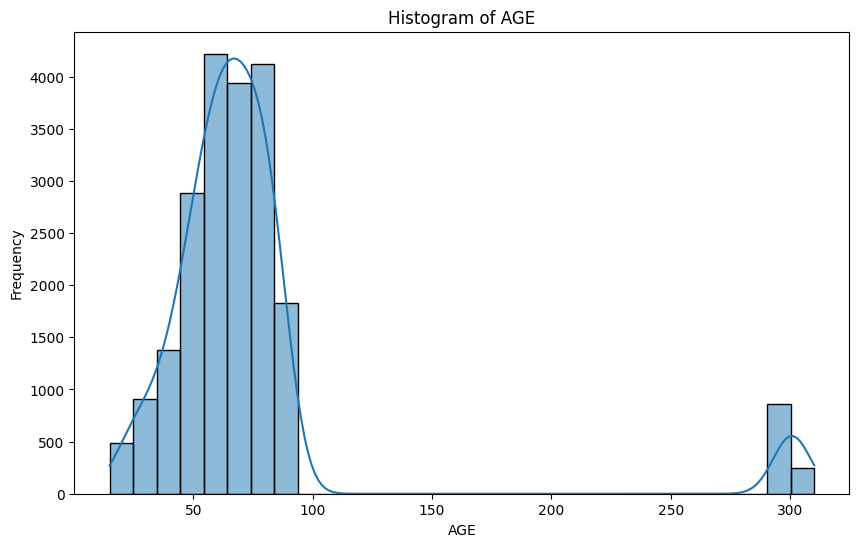

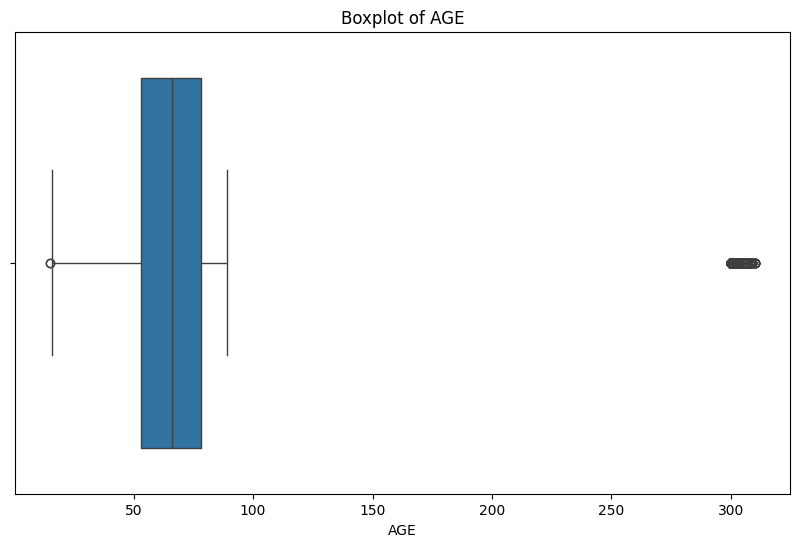

In [6]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(train_df1['AGE'], bins=30, kde=True)
plt.title('Histogram of AGE')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df1['AGE'])
plt.title('Boxplot of AGE')
plt.xlabel('AGE')
plt.show()

In [7]:
# Calculate the value at the 92th percentile
p92 = train_df1['AGE'].quantile(0.92)
filtered_df = train_df1[train_df1['AGE'] > p92]

print('Age of 92th percentile:',p92)
print('Observations over 87 yrs old:',sum(train_df1['AGE'] > p92))

train_df1.loc[train_df1['AGE'] > 100, 'AGE'] = 90

Age of 92th percentile: 87.0
Observations over 87 yrs old: 1524


### If we were to discard all outliers (above 300yrs old), we would be loosing valuable info. We opt for imputing all outliers (above 87yrs old) as a 90 year old.

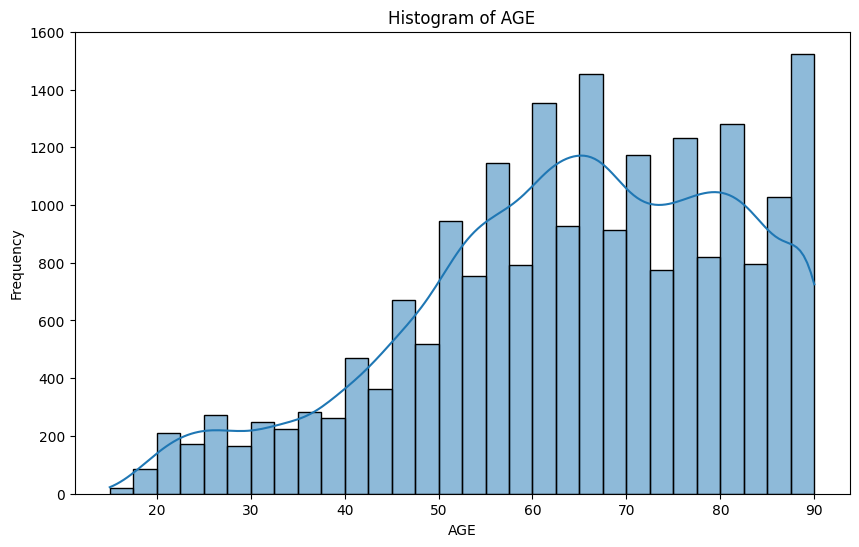

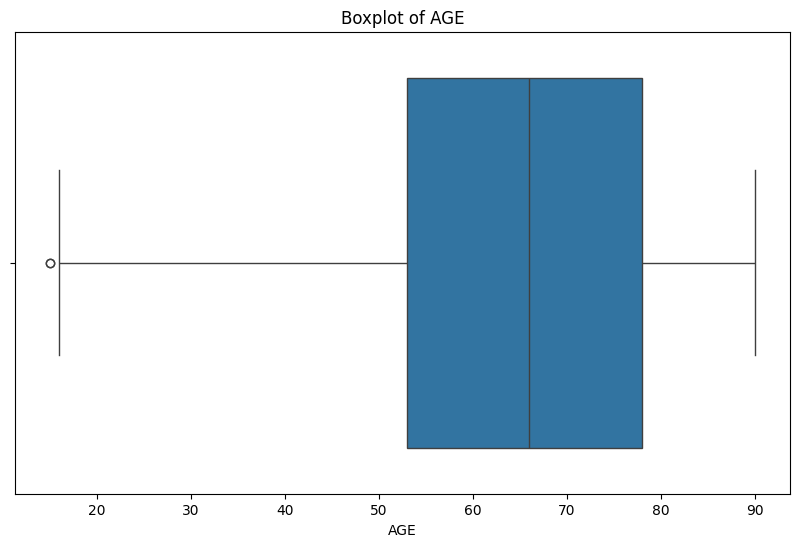

In [8]:
# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(train_df1['AGE'], bins=30, kde=True)
plt.title('Histogram of AGE')
plt.xlabel('AGE')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df1['AGE'])
plt.title('Boxplot of AGE')
plt.xlabel('AGE')
plt.show()

#### We check which columns are only present in the training dataframe; those are related to the death of the patient so we need to avoid them

In [9]:
train_cols = set(train_df1.columns)
test_cols = set(test_df1.columns)

# Columns in both train and test
common_cols = train_cols.intersection(test_cols)
print("Columns in both train and test:")
print(common_cols)

# Columns only in train
train_only_cols = train_cols.difference(test_cols)
print("\nColumns only in train:")
print(train_only_cols)

Columns in both train and test:
{'AGE', 'Glucose_Min', 'icustay_id', 'ADMITTIME', 'RELIGION', 'MeanBP_Min', 'SpO2_Max', 'SpO2_Min', 'hadm_id', 'RespRate_Max', 'TempC_Min', 'TempC_Mean', 'SysBP_Max', 'Glucose_Max', 'SysBP_Min', 'TempC_Max', 'SysBP_Mean', 'ETHNICITY', 'GENDER', 'SpO2_Mean', 'FIRST_CAREUNIT', 'ICD9_diagnosis', 'Glucose_Mean', 'subject_id', 'MeanBP_Max', 'INSURANCE', 'RespRate_Mean', 'DiasBP_Mean', 'MeanBP_Mean', 'HeartRate_Min', 'Diff', 'DiasBP_Min', 'RespRate_Min', 'ADMISSION_TYPE', 'DIAGNOSIS', 'HeartRate_Mean', 'HeartRate_Max', 'MARITAL_STATUS', 'DiasBP_Max'}

Columns only in train:
{'HOSPITAL_EXPIRE_FLAG', 'LOS', 'DOD', 'DISCHTIME', 'DEATHTIME'}


In [10]:
#We cannot use death features to predict death probability
train_df1 = train_df1.drop(['DISCHTIME', 'DOD', 'LOS', 'DEATHTIME'], axis=1)

### We shall use a subset of relevant columns.

IDs do not provide any information.
Death related variables cannot be used to predict death since that would not make sense.

In [11]:
#IDs are not needed
train_df1 = train_df1.drop(['icustay_id'], axis=1) 
test_df1 = test_df1.drop(['icustay_id'], axis=1)

# Count the number of hospital stays per 'subject_id' and assign it to a new column
train_df1['NUM_STAYS'] = train_df1.groupby('subject_id')['subject_id'].transform('count')
test_df1['NUM_STAYS'] = test_df1.groupby('subject_id')['subject_id'].transform('count')

train_df1 = train_df1.drop(['subject_id'], axis=1) 
test_df1 = test_df1.drop(['subject_id'], axis=1)

We will think of which non numerical variables we can actually use and if so; what preprocess is needed

In [12]:
non_num_features = ['INSURANCE', 'RELIGION', 'ETHNICITY', 'DIAGNOSIS', 'FIRST_CAREUNIT', 'ADMISSION_TYPE','ADMITTIME','hadm_id','ICD9_diagnosis']

for c in non_num_features:
    print(f'{c}:')
    print(sorted(train_df1[c].unique()))
    print('Number of unique values:', len(train_df1[c].unique()))


INSURANCE:
['Government', 'Medicaid', 'Medicare', 'Private', 'Self Pay']
Number of unique values: 5
RELIGION:
['7TH DAY ADVENTIST', 'BUDDHIST', 'CATHOLIC', 'CHRISTIAN SCIENTIST', 'EPISCOPALIAN', 'GREEK ORTHODOX', 'HEBREW', 'HINDU', "JEHOVAH'S WITNESS", 'JEWISH', 'MUSLIM', 'NOT SPECIFIED', 'OTHER', 'PROTESTANT QUAKER', 'ROMANIAN EAST. ORTH', 'UNITARIAN-UNIVERSALIST', 'UNOBTAINABLE']
Number of unique values: 17
ETHNICITY:
['AMERICAN INDIAN/ALASKA NATIVE', 'AMERICAN INDIAN/ALASKA NATIVE FEDERALLY RECOGNIZED TRIBE', 'ASIAN', 'ASIAN - ASIAN INDIAN', 'ASIAN - CAMBODIAN', 'ASIAN - CHINESE', 'ASIAN - FILIPINO', 'ASIAN - JAPANESE', 'ASIAN - KOREAN', 'ASIAN - OTHER', 'ASIAN - THAI', 'ASIAN - VIETNAMESE', 'BLACK/AFRICAN', 'BLACK/AFRICAN AMERICAN', 'BLACK/CAPE VERDEAN', 'BLACK/HAITIAN', 'CARIBBEAN ISLAND', 'HISPANIC OR LATINO', 'HISPANIC/LATINO - CENTRAL AMERICAN (OTHER)', 'HISPANIC/LATINO - COLOMBIAN', 'HISPANIC/LATINO - CUBAN', 'HISPANIC/LATINO - DOMINICAN', 'HISPANIC/LATINO - GUATEMALAN', 'HISP

### Some features have way to many unique categories for us to use and others we decide they shouldn't provide relevant information.

#### We will make use of First Care Unit, Admission Type and Gender for their relevance. We have already calculated age by the time of entering the hospital so Admit time and Date of birth do not provide extra information. Finally, Ethnicity, Diagnosis and Isurance will be dropped.

In [13]:
train_df1 = train_df1.drop(['INSURANCE', 'RELIGION', 'ETHNICITY', 'ADMITTIME', 'MARITAL_STATUS','Diff'], axis=1) 
test_df1 = test_df1.drop(['INSURANCE', 'RELIGION', 'ETHNICITY', 'ADMITTIME', 'MARITAL_STATUS','Diff'], axis=1)

### Although Urgent might appear more serious than Emergency, we see that mortality rate is actually higher in the later one. We will consider this in our encoding.

In [14]:
print(sum(train_df1.loc[train_df1['ADMISSION_TYPE']=='ELECTIVE']['HOSPITAL_EXPIRE_FLAG']==True) / train_df1.loc[train_df1['ADMISSION_TYPE']=='ELECTIVE'].shape[0])

print(sum(train_df1.loc[train_df1['ADMISSION_TYPE']=='URGENT']['HOSPITAL_EXPIRE_FLAG']==True) / train_df1.loc[train_df1['ADMISSION_TYPE']=='URGENT'].shape[0])

print(sum(train_df1.loc[train_df1['ADMISSION_TYPE']=='EMERGENCY']['HOSPITAL_EXPIRE_FLAG']==True) / train_df1.loc[train_df1['ADMISSION_TYPE']=='EMERGENCY'].shape[0])

0.032654494382022475
0.06818181818181818
0.1255542459448841


## Manually encode categorical features

In [15]:
#Encode the gender variable to 0 and 1
train_df1['MALE'] = train_df1['GENDER'].map({'M': 1, 'F': 0})
test_df1['MALE'] = test_df1['GENDER'].map({'M': 1, 'F': 0})

train_df1 = train_df1.drop('GENDER', axis=1)
test_df1 = test_df1.drop('GENDER', axis=1)


#Encode the Admission type variable into an ordinal variable 
# Manual mapping
admiss_type_order = {
    'ELECTIVE': 0,
    'URGENT': 1,
    'EMERGENCY': 2
}

train_df1['ADMISSION_TYPE'] = train_df1['ADMISSION_TYPE'].map(admiss_type_order)
test_df1['ADMISSION_TYPE'] = test_df1['ADMISSION_TYPE'].map(admiss_type_order)


In [16]:
#Checking for null values, very high percentage of null values in the data wouldn't be useful

Nulls_train= train_df1.isnull().sum()
Nulls_test= test_df1.isnull().sum()

Nulls_train/len(train_df1)

HOSPITAL_EXPIRE_FLAG    0.000000
hadm_id                 0.000000
HeartRate_Min           0.104716
HeartRate_Max           0.104716
HeartRate_Mean          0.104716
SysBP_Min               0.105722
SysBP_Max               0.105722
SysBP_Mean              0.105722
DiasBP_Min              0.105770
DiasBP_Max              0.105770
DiasBP_Mean             0.105770
MeanBP_Min              0.104668
MeanBP_Max              0.104668
MeanBP_Mean             0.104668
RespRate_Min            0.104812
RespRate_Max            0.104812
RespRate_Mean           0.104812
TempC_Min               0.119559
TempC_Max               0.119559
TempC_Mean              0.119559
SpO2_Min                0.105482
SpO2_Max                0.105482
SpO2_Mean               0.105482
Glucose_Min             0.012114
Glucose_Max             0.012114
Glucose_Mean            0.012114
ADMISSION_TYPE          0.000000
DIAGNOSIS               0.000000
ICD9_diagnosis          0.000000
FIRST_CAREUNIT          0.000000
AGE       

### NAs seem to be present for the same observations. We will create a new feature that takes value 1 if that observations has any missing; since it could be useful information.

In [17]:
train_df2 = train_df1.copy()
test_df2 = test_df1.copy()

# Create a new column 'has_NA' which is 1 if any column in the row has NA, else 0
train_df2['has_NA'] = train_df2.isnull().any(axis=1).astype(int)
test_df2['has_NA'] = test_df2.isnull().any(axis=1).astype(int)
print(train_df2['has_NA'].value_counts())
print(test_df2['has_NA'].value_counts())

has_NA
0    18113
1     2772
Name: count, dtype: int64
has_NA
0    4519
1     702
Name: count, dtype: int64


## We analyze the diagnosis column.

However, since we will be using the ICD9 code eventually, we opt to not use diagnosis.

10980


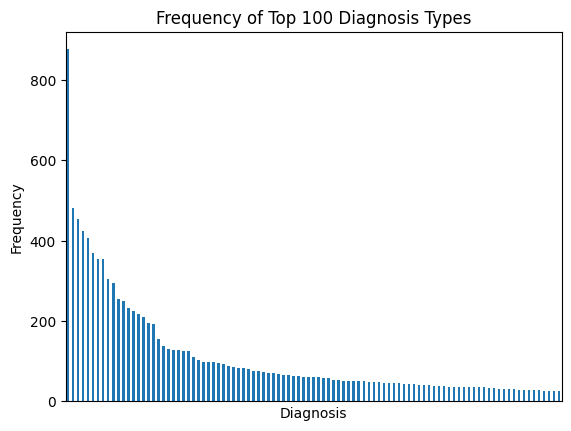

In [18]:
diagnosis_counts = train_df2.groupby('DIAGNOSIS').size()
diagnosis_counts_sorted = diagnosis_counts.sort_values(ascending=False)[0:99]

print(sum(diagnosis_counts_sorted))

diagnosis_counts_sorted.plot(kind='bar')
plt.title('Frequency of Top 100 Diagnosis Types')
plt.xlabel('Diagnosis')
plt.ylabel('Frequency')
plt.xticks(ticks=[], labels=[])  # Remove x-axis names for clarity
plt.show()


#### Previously we were looking for some prediction power in the diagnosis text feature, but since we opted for using the code as a more robust method we dicard the first idea.

In [19]:
# X_train2['CANCER?'] = X_train2['DIAGNOSIS'].apply(lambda x: 1 if "CANCER" in x else 0)
# X_train2['CHEST_PAIN?'] = X_train2['DIAGNOSIS'].apply(lambda x: 1 if "CHEST PAIN" in x else 0)

# X_test2['CANCER?'] = X_test2['DIAGNOSIS'].apply(lambda x: 1 if "CANCER" in x else 0)
# X_test2['CHEST_PAIN?'] = X_test2['DIAGNOSIS'].apply(lambda x: 1 if "CHEST PAIN" in x else 0)

train_df2 = train_df2.drop('DIAGNOSIS', axis=1)
test_df2 = test_df2.drop('DIAGNOSIS', axis=1)

In [20]:
na_columns_num = train_df2.columns[train_df2.isna().any()].tolist()
print(na_columns_num)

['HeartRate_Min', 'HeartRate_Max', 'HeartRate_Mean', 'SysBP_Min', 'SysBP_Max', 'SysBP_Mean', 'DiasBP_Min', 'DiasBP_Max', 'DiasBP_Mean', 'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean', 'RespRate_Min', 'RespRate_Max', 'RespRate_Mean', 'TempC_Min', 'TempC_Max', 'TempC_Mean', 'SpO2_Min', 'SpO2_Max', 'SpO2_Mean', 'Glucose_Min', 'Glucose_Max', 'Glucose_Mean']


In [21]:
dummies_train = pd.get_dummies(train_df2['FIRST_CAREUNIT'], prefix='FIRST_CAREUNIT', drop_first=False)
dummies_test = pd.get_dummies(test_df2['FIRST_CAREUNIT'], prefix='FIRST_CAREUNIT', drop_first=False)

# Concatenate the new dummy variables to the original DataFrame
train_df2 = pd.concat([train_df2, dummies_train], axis=1)
train_df2 = train_df2.drop('FIRST_CAREUNIT', axis=1)

test_df2 = pd.concat([test_df2, dummies_test], axis=1)
test_df2 = test_df2.drop('FIRST_CAREUNIT', axis=1)

In [22]:
#We need to do this split because our function cannot calculate conditional means for non numerical variables. We will re-merge them back before standarization.
imputation_cols = ['HeartRate_Min', 'HeartRate_Max', 'HeartRate_Mean', 'SysBP_Min', 'SysBP_Max', 'SysBP_Mean', 'DiasBP_Min', 'DiasBP_Max', 'DiasBP_Mean', 'MeanBP_Min', 'MeanBP_Max', 'MeanBP_Mean', 'RespRate_Min', 'RespRate_Max', 'RespRate_Mean', 'TempC_Min', 'TempC_Max', 'TempC_Mean', 'SpO2_Min', 'SpO2_Max', 'SpO2_Mean', 'Glucose_Min', 'Glucose_Max', 'Glucose_Mean','AGE','MALE']
train_imputation = train_df2[imputation_cols]
test_imputation = test_df2[imputation_cols]


#After imputation we need to concatenate categorical data with the ones that were imputed. For test we dont have the hospital flag feature so a subset of features is needed. 
remaining_cols_train = ['HOSPITAL_EXPIRE_FLAG', 'hadm_id', 'ADMISSION_TYPE', 'ICD9_diagnosis', 'NUM_STAYS', 'has_NA', 'FIRST_CAREUNIT_CCU', 'FIRST_CAREUNIT_CSRU', 'FIRST_CAREUNIT_MICU', 'FIRST_CAREUNIT_SICU', 'FIRST_CAREUNIT_TSICU']
remaining_cols_test = ['hadm_id', 'ADMISSION_TYPE', 'ICD9_diagnosis', 'NUM_STAYS', 'has_NA', 'FIRST_CAREUNIT_CCU', 'FIRST_CAREUNIT_CSRU', 'FIRST_CAREUNIT_MICU', 'FIRST_CAREUNIT_SICU', 'FIRST_CAREUNIT_TSICU']
#Not ideal

train_remaining = train_df2[remaining_cols_train]
test_remaining = test_df2[remaining_cols_test]

# Mean Imputer by groups.

### Since we are doing the prediction exercise with a KNN model, then the decision for the imputation of data was to use conditional means on age and gender. This is an attempt to diminish the amount of bias we could be adding by imputing with a single mean.

### Also, since there are no NaNs for non-numerical features, the calculation doesn't need any special treatment.

In [23]:
# Calculate conditional means
conditional_means = train_imputation.groupby(['AGE', 'MALE']).mean()

# Copy datasets to avoid changing original dataframes
train_df2_filled = train_imputation.copy()
test_df2_filled = test_imputation.copy()

# Function to safely get conditional mean, or fallback to global mean if not available
def get_conditional_mean(row, column, fallback):
    try:
        # Attempt to return the conditional mean based on AGE and MALE
        return conditional_means.loc[(row['AGE'], row['MALE']), column]
    except KeyError:
        # Fallback if specific group mean is not available
        return fallback

# Fill NAs in training data with conditional means or global mean if conditional mean is not available
for column in na_columns_num:
    global_mean = train_df2_filled[column].mean()  # Calculate global mean for fallback
    condition = train_df2_filled[column].isnull()
    train_df2_filled.loc[condition, column] = train_df2_filled[condition].apply(lambda x: get_conditional_mean(x, column, global_mean), axis=1)

# Do the same for test data, using the conditional means from the training data
for column in na_columns_num:
    global_mean = train_df2_filled[column].mean()  # Use global mean from training data for consistency
    condition = test_df2_filled[column].isnull()
    test_df2_filled.loc[condition, column] = test_df2_filled[condition].apply(lambda x: get_conditional_mean(x, column, global_mean), axis=1)


# Check if there are still any NAs
print('Missing Data in training DS \n' ,train_df2_filled[na_columns_num].isnull().sum().sum())
print('Missing Data in test DS \n', test_df2_filled[na_columns_num].isnull().sum().sum())

print(train_df2.shape, train_df2_filled.shape)
print(test_df2.shape, test_df2_filled.shape)


Missing Data in training DS 
 0
Missing Data in test DS 
 0
(20885, 37) (20885, 26)
(5221, 36) (5221, 26)


In [24]:
#Instead of havieng 3 columns for each indicator, we will create a column using the 3 of them.
def create_range_col(df, column_names):
    for name in column_names:
        df[f'{name}_Range'] = (df[f'{name}_Max'] - df[f'{name}_Min']) / df[f'{name}_Mean']
        df = df.drop([f'{name}_Max', f'{name}_Min', f'{name}_Mean'], axis=1)
    return df

num_columns = ['HeartRate', 'DiasBP', 'SysBP', 'MeanBP', 'RespRate', 'TempC', 'SpO2', 'Glucose']

train_df2_filled = create_range_col(train_df2_filled, num_columns)
test_df2_filled = create_range_col(test_df2_filled, num_columns)


In [25]:
print(train_df2_filled.columns)
print(test_df2_filled.columns)


Index(['AGE', 'MALE', 'HeartRate_Range', 'DiasBP_Range', 'SysBP_Range',
       'MeanBP_Range', 'RespRate_Range', 'TempC_Range', 'SpO2_Range',
       'Glucose_Range'],
      dtype='object')
Index(['AGE', 'MALE', 'HeartRate_Range', 'DiasBP_Range', 'SysBP_Range',
       'MeanBP_Range', 'RespRate_Range', 'TempC_Range', 'SpO2_Range',
       'Glucose_Range'],
      dtype='object')


### By this point, we have the original dataset preprocessed, before standarization. We rejoin the columns we imputed with the rest of our datasets. 
### Now we will delve into the extra data

In [26]:
train_df2_final = pd.concat([train_remaining, train_df2_filled], axis=1)
test_df2_final = pd.concat([test_remaining, test_df2_filled], axis=1)

In [27]:
#Sanity check
print(train_df2_final.columns)
print(test_df2_final.columns)

print(test_df2_final.shape)
print(train_df2_final.shape)

Index(['HOSPITAL_EXPIRE_FLAG', 'hadm_id', 'ADMISSION_TYPE', 'ICD9_diagnosis',
       'NUM_STAYS', 'has_NA', 'FIRST_CAREUNIT_CCU', 'FIRST_CAREUNIT_CSRU',
       'FIRST_CAREUNIT_MICU', 'FIRST_CAREUNIT_SICU', 'FIRST_CAREUNIT_TSICU',
       'AGE', 'MALE', 'HeartRate_Range', 'DiasBP_Range', 'SysBP_Range',
       'MeanBP_Range', 'RespRate_Range', 'TempC_Range', 'SpO2_Range',
       'Glucose_Range'],
      dtype='object')
Index(['hadm_id', 'ADMISSION_TYPE', 'ICD9_diagnosis', 'NUM_STAYS', 'has_NA',
       'FIRST_CAREUNIT_CCU', 'FIRST_CAREUNIT_CSRU', 'FIRST_CAREUNIT_MICU',
       'FIRST_CAREUNIT_SICU', 'FIRST_CAREUNIT_TSICU', 'AGE', 'MALE',
       'HeartRate_Range', 'DiasBP_Range', 'SysBP_Range', 'MeanBP_Range',
       'RespRate_Range', 'TempC_Range', 'SpO2_Range', 'Glucose_Range'],
      dtype='object')
(5221, 20)
(20885, 21)


## Preprocess of extra data set

In [28]:
icd9_codes_grouped = extra_df1.groupby('HADM_ID')['ICD9_CODE'].agg(list).reset_index()

lengths = icd9_codes_grouped['ICD9_CODE'].apply(len)

# Find the maximum length
max_length = lengths.max()
max_length

# Expand the 'ICD9_CODE' lists into separate columns
expanded_codes = icd9_codes_grouped['ICD9_CODE'].apply(pd.Series)

# Rename the columns to 'CODE + num' until 39 (max num of codes in any hospital stay)
expanded_codes.columns = [f'CODE{i+1}' for i in expanded_codes.columns]

# Join the expanded columns back to the original DataFrame
icd9_codes_grouped = pd.concat([icd9_codes_grouped, expanded_codes], axis=1)
icd9_codes_grouped = icd9_codes_grouped.drop('ICD9_CODE', axis=1)

In [29]:
print(icd9_codes_grouped.shape)
icd9_codes_grouped.head(10)

(58976, 40)


,HADM_ID,CODE1,CODE2,CODE3,CODE4,CODE5,CODE6,CODE7,CODE8,CODE9,CODE10,CODE11,CODE12,CODE13,CODE14,CODE15,CODE16,CODE17,CODE18,CODE19,CODE20,CODE21,CODE22,CODE23,CODE24,CODE25,CODE26,CODE27,CODE28,CODE29,CODE30,CODE31,CODE32,CODE33,CODE34,CODE35,CODE36,CODE37,CODE38,CODE39
0,100001,25013,3371,5849,5780,V5867,25063,5363,4580,25043,40390,5853,25053,36201,25083,7078,V1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,53100,2851,07054,5715,45621,53789,4019,53550,7823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100006,49320,51881,486,20300,2761,7850,3090,V1251,V1582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100007,56081,5570,9973,486,4019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100009,41401,99604,4142,25000,27800,V8535,4148,4111,V4582,V1582,2859,4019,2720,4262,44021,V153,V5867,V4502,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,100010,1890,1961,1987,1976,27652,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,100011,85206,82111,86403,48242,8600,2851,86121,80703,8220,8052,30560,8900,82525,E8152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,100012,41401,99811,4139,4019,2720,V1582,V4582,V153,V1021,V8741,E8782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,100014,71831,7260,7262,7388,72610,V4586,27800,3004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,100016,5070,51881,25541,47874,7580,34590,2512,45829,30000,5368,V441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## We join the datasets with the extra data

In [30]:
# Merge the DataFrames on 'hadm_id' and 'HADM_ID'
merged_train_df = pd.merge(train_df2_final, icd9_codes_grouped, left_on='hadm_id', right_on='HADM_ID', how='inner')
merged_test_df = pd.merge(test_df2_final, icd9_codes_grouped, left_on='hadm_id', right_on='HADM_ID', how='inner')

In [31]:
print(merged_train_df.columns)

Index(['HOSPITAL_EXPIRE_FLAG', 'hadm_id', 'ADMISSION_TYPE', 'ICD9_diagnosis',
       'NUM_STAYS', 'has_NA', 'FIRST_CAREUNIT_CCU', 'FIRST_CAREUNIT_CSRU',
       'FIRST_CAREUNIT_MICU', 'FIRST_CAREUNIT_SICU', 'FIRST_CAREUNIT_TSICU',
       'AGE', 'MALE', 'HeartRate_Range', 'DiasBP_Range', 'SysBP_Range',
       'MeanBP_Range', 'RespRate_Range', 'TempC_Range', 'SpO2_Range',
       'Glucose_Range', 'HADM_ID', 'CODE1', 'CODE2', 'CODE3', 'CODE4', 'CODE5',
       'CODE6', 'CODE7', 'CODE8', 'CODE9', 'CODE10', 'CODE11', 'CODE12',
       'CODE13', 'CODE14', 'CODE15', 'CODE16', 'CODE17', 'CODE18', 'CODE19',
       'CODE20', 'CODE21', 'CODE22', 'CODE23', 'CODE24', 'CODE25', 'CODE26',
       'CODE27', 'CODE28', 'CODE29', 'CODE30', 'CODE31', 'CODE32', 'CODE33',
       'CODE34', 'CODE35', 'CODE36', 'CODE37', 'CODE38', 'CODE39'],
      dtype='object')


In [37]:
#List of code columns to be encoded
code_columns = [f'CODE{i}' for i in range(1, 40)]

# Initialize the TargetEncoder
encoder = ce.TargetEncoder(cols=code_columns, smoothing=70) #Submitted a few runs to improve the smoothing param.

# Fit the encoder using the training data
encoder.fit(merged_train_df[code_columns], merged_train_df['HOSPITAL_EXPIRE_FLAG'])

# Transform the code columns in the training and test data
train_df_encoded = encoder.transform(merged_train_df[code_columns])
test_df_encoded = encoder.transform(merged_test_df[code_columns])

#### The smoothing param was roughly estimated by how predictions out of sample. Ideally, we would run a cross validation for this in order to optimize.

In [38]:
merged_train_df.update(train_df_encoded)
merged_test_df.update(test_df_encoded)

### Finally, we drop hadm_id and ICD9_diagnosis

In [39]:
#Final details on our data
y_train = merged_train_df['HOSPITAL_EXPIRE_FLAG']
X_train = merged_train_df.drop(['HOSPITAL_EXPIRE_FLAG','hadm_id', 'HADM_ID', 'ICD9_diagnosis'], axis=1) 
X_test = merged_test_df.drop(['hadm_id', 'HADM_ID', 'ICD9_diagnosis'], axis=1) 

## Final dataset before scalling

In [40]:
X_test

,ADMISSION_TYPE,NUM_STAYS,has_NA,FIRST_CAREUNIT_CCU,FIRST_CAREUNIT_CSRU,FIRST_CAREUNIT_MICU,FIRST_CAREUNIT_SICU,FIRST_CAREUNIT_TSICU,AGE,MALE,HeartRate_Range,DiasBP_Range,SysBP_Range,MeanBP_Range,RespRate_Range,TempC_Range,SpO2_Range,Glucose_Range,CODE1,CODE2,CODE3,CODE4,CODE5,CODE6,CODE7,CODE8,CODE9,CODE10,CODE11,CODE12,CODE13,CODE14,CODE15,CODE16,CODE17,CODE18,CODE19,CODE20,CODE21,CODE22,CODE23,CODE24,CODE25,CODE26,CODE27,CODE28,CODE29,CODE30,CODE31,CODE32,CODE33,CODE34,CODE35,CODE36,CODE37,CODE38,CODE39
0,0,1,0,False,True,False,False,False,82.0,1,0.375389,0.711290,0.771645,0.718475,1.464115,0.077529,0.050408,1.046893,0.013433,0.10647,0.078034,0.078465,0.124495,0.094796,0.057809,0.042709,0.128645,0.000161,0.111557,0.207304,0.066308,0.138853,0.140295,0.036197,0.078391,0.107439,0.160047,0.103699,0.0877,0.090642,0.092751,0.094957,0.09674,0.097771,0.099695,0.101017,0.102273,0.102879,0.105174,0.106431,0.107073,0.107987,0.108601,0.109256,0.109853,0.110161,0.110431
1,2,1,0,False,False,True,False,False,48.0,1,0.469338,0.670947,0.691628,2.658824,0.766355,0.089574,0.071672,2.206748,0.017765,0.276819,0.121317,0.301884,0.272427,0.163272,0.076409,0.063488,0.002526,0.102077,0.053112,0.06349,0.064979,0.067376,0.07181,0.074089,0.076243,0.079358,0.08215,0.085,0.0877,0.090642,0.092751,0.094957,0.09674,0.097771,0.099695,0.101017,0.102273,0.102879,0.105174,0.106431,0.107073,0.107987,0.108601,0.109256,0.109853,0.110161,0.110431
2,0,3,0,False,False,True,False,False,42.0,1,0.220807,0.374792,0.378585,0.349080,0.498382,0.052110,0.083430,0.398374,0.010915,0.118459,0.064603,0.128592,0.167556,0.121435,0.128442,0.040523,0.013384,0.007972,0.081522,0.050685,0.064979,0.067376,0.07181,0.074089,0.076243,0.079358,0.08215,0.085,0.0877,0.090642,0.092751,0.094957,0.09674,0.097771,0.099695,0.101017,0.102273,0.102879,0.105174,0.106431,0.107073,0.107987,0.108601,0.109256,0.109853,0.110161,0.110431
3,2,1,0,True,False,False,False,False,84.0,0,0.394609,0.954585,0.756014,0.815287,1.142857,0.049646,0.115458,0.319185,0.438453,0.033005,0.093547,0.061851,0.074806,0.167685,0.069016,0.112282,0.049123,0.134041,0.094889,0.090088,0.122048,0.0747,0.089076,0.156141,0.076243,0.079358,0.08215,0.085,0.0877,0.090642,0.092751,0.094957,0.09674,0.097771,0.099695,0.101017,0.102273,0.102879,0.105174,0.106431,0.107073,0.107987,0.108601,0.109256,0.109853,0.110161,0.110431
4,2,2,0,False,False,True,False,False,53.0,0,0.395538,1.112128,0.524096,0.798457,0.910547,0.031839,0.145833,1.118971,0.000007,0.005472,0.112282,0.041266,0.112282,0.112282,0.256141,0.005325,0.185981,0.112282,0.352317,0.322717,0.142784,0.000164,0.139429,0.194845,0.07278,0.220951,0.217408,0.19365,0.098422,0.003728,0.133715,0.093845,0.116279,0.64679,0.012565,0.112282,0.233041,0.102879,0.105174,0.106431,0.107073,0.107987,0.108601,0.109256,0.109853,0.110161,0.110431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5216,2,2,0,False,False,False,True,False,59.0,0,0.700090,0.478992,0.260944,0.304280,0.688380,0.029123,0.138237,0.696581,0.000176,0.07278,0.303234,0.091616,0.1139,0.000073,0.127489,0.185981,0.170528,0.128442,0.214172,0.000278,0.265564,0.000998,0.005936,0.194845,0.002389,0.066382,0.017981,0.042015,0.150269,0.017554,0.008186,0.138707,0.024867,0.031153,0.156141,0.195284,0.04164,0.225964,0.056943,0.049752,0.038331,0.048175,0.058145,0.049752,0.284081,0.048962,0.052936
5217,0,1,1,False,True,False,False,False,76.0,1,0.386846,0.758098,0.530834,0.713745,0.836476,0.034618,0.084649,0.657968,0.013433,0.148152,0.078034,0.084717,0.102224,0.266399,0.204225,0.185981,0.185981,0.223166,0.352317,0.107423,0.169514,0.180386,0.44221,0.212352,0.170917,0.186855,0.144841,0.108324,0.0877,0.090642,0.092751,0.094957,0.09674,0.097771,0.099695,0.101017,0.102273,0.102879,0.105174,0.106431,0.107073,0.107987,0.108601,0.109256,0.109853,0.110161,0.110431
5218,2,2,0,False,False

## Standarization

In [41]:
scaler = preprocessing.StandardScaler()

#Fit with the train data
scaler.fit(X_train) 

#Transform the train and test data with the previously fitted scaler
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Get the data back into a pandas dataframe.
X_train_scaled=pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)

## Re-balancing 

HOSPITAL_EXPIRE_FLAG
0    18540
1     2345
Name: count, dtype: int64


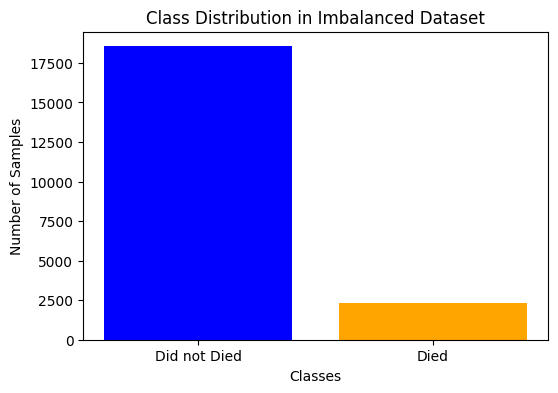

In [42]:
# Calculate the number of samples per class
not_dead = np.sum(y_train == 0)
dead = np.sum(y_train == 1)

print(y_train.value_counts())

# Create a bar plot to visualize the class distribution
plt.figure(figsize=(6, 4))
plt.bar(['Did not Died', 'Died'], [not_dead, dead], color=['blue', 'orange'])
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Imbalanced Dataset')
plt.show()

### Classes are clearly unbalanced, might help to do oversampling of the sub represented class.

In [90]:
# Create an instance of SMOTE
smote = SMOTE(sampling_strategy=0.25, random_state=123, k_neighbors= 30)

# Resample the data using SMOTE
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Check the class distribution after resampling
print(y_train_resampled.value_counts())


HOSPITAL_EXPIRE_FLAG
0    18540
1     4635
Name: count, dtype: int64


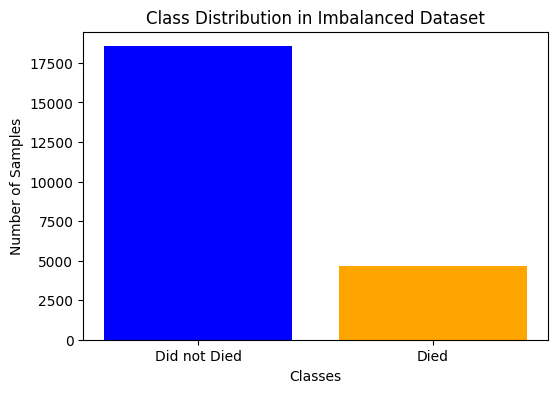

In [91]:
not_dead_resampled = np.sum(y_train_resampled == 0)
dead_resampled = np.sum(y_train_resampled == 1)

# Create a bar plot to visualize the class distribution
plt.figure(figsize=(6, 4))
plt.bar(['Did not Died', 'Died'], [not_dead_resampled, dead_resampled], color=['blue', 'orange'])
plt.xlabel('Classes')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in Imbalanced Dataset')
plt.show()

### Although we did re-balancing; our prediction got considerably worse. We opt to leave it out of the prediction process.

# KNN Implementation

Brute algorithm used, no point in trying others since it ended up not being restrictive its use. Gridsearch for distance metric and number of neighbours. Scoring used is determined in class

In [43]:
#%%time

MyKNN = KNeighborsClassifier(algorithm='brute',metric='minkowski',p=2,n_jobs=5) 


weights = ['uniform', 'distance']
k_vals = range(5,100,5)
grid_values = {'n_neighbors':k_vals, 'weights':weights}

grid_knn_acc = GridSearchCV(MyKNN, param_grid = grid_values, scoring = 'roc_auc', cv=10)


In [44]:
grid_knn_acc.fit(X_train_scaled, y_train)


GridSearchCV(cv=10, estimator=KNeighborsClassifier(algorithm='brute', n_jobs=5),
             param_grid={'n_neighbors': range(5, 100, 5),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [45]:
print('best parameters:', grid_knn_acc.best_params_)
print('best score:', grid_knn_acc.best_score_)

best parameters: {'n_neighbors': 85, 'weights': 'distance'}
best score: 0.9697896361660734


### The K that gives us the best performance is 85. We will do another iteration

In [46]:
weights2 = ['uniform', 'distance']
k_vals2 = range(50, 120, 2)

grid_values2 = {'n_neighbors':k_vals2, 'weights':weights2}


grid_knn_acc2 = GridSearchCV(MyKNN, param_grid = grid_values2, scoring = 'roc_auc', cv=12)
grid_knn_acc2.fit(X_train_scaled, y_train)


GridSearchCV(cv=12, estimator=KNeighborsClassifier(algorithm='brute', n_jobs=5),
             param_grid={'n_neighbors': range(50, 120, 2),
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [47]:
best_params = grid_knn_acc2.best_params_
print('best parameters:', best_params)
print('best score:', grid_knn_acc2.best_score_)

best parameters: {'n_neighbors': 114, 'weights': 'distance'}
best score: 0.9702915112190423


### Fit of the final model

In [48]:
best_knn = KNeighborsClassifier(**best_params)
best_knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=114, weights='distance')

# Predictions on the test set

In [50]:
y_hat_test_knn = best_knn.predict_proba(X_test_scaled)
y_hat_test_knn = y_hat_test_knn[:,1]

In [51]:
# Produce .csv for kaggle testing
test_predictions_submit = pd.DataFrame({"icustay_id": test_df['icustay_id'], "HOSPITAL_EXPIRE_FLAG": y_hat_test_knn})
test_predictions_submit.to_csv("KNN_pred.csv", index = False)

# Support Vector Machines

### For computing restrictions, we will subset 20% of the training data to optimize certain params like the kernel and alpha param

In [40]:
# Downsample data to 20%
X_subset, _, y_subset, _ = train_test_split(X_train_scaled, y_train, test_size=0.8, random_state=42, stratify=y_train)

print(X_subset.shape)
print(y_subset.shape)

(4177, 58)
(4177,)


In [43]:
grid_values_svc_subset = {
    'C': [0.1, 1, 10, 50],  # Regularization parameter.
    'gamma': [0.1, 0.4, 0.6],  # Kernel coefficient for 'rbf'.
    'kernel': ['linear', 'rbf'],  # Types of kernels to be tested.
    'class_weight': [None, 'balanced'] 
}
# Initialize 
svm_clf_subset = SVC(probability=True)  
# Cross-validation
subset_svm = GridSearchCV(svm_clf_subset, param_grid = grid_values_svc_subset,scoring = 'roc_auc', cv=8, verbose=2, n_jobs=6)
# Fit
subset_svm.fit(X_subset,y_subset)


Fitting 8 folds for each of 48 candidates, totalling 384 fits


GridSearchCV(cv=8, estimator=SVC(probability=True), n_jobs=6,
             param_grid={'C': [0.1, 1, 10, 50],
                         'class_weight': [None, 'balanced'],
                         'gamma': [0.1, 0.4, 0.6],
                         'kernel': ['linear', 'rbf']},
             scoring='roc_auc', verbose=1)

In [44]:
# Best parameter set
print("Best parameters found: ", subset_svm.best_params_)

# Best score from the grid search
print("Best ROC AUC score from cross-validation: ", subset_svm.best_score_)

Best parameters found:  {'C': 0.1, 'class_weight': 'balanced', 'gamma': 0.1, 'kernel': 'linear'}
Best ROC AUC score from cross-validation:  0.9545026218712072


### CV with the full dataset. We have a better idea of the param grid thanks to the previous iteration.

In [45]:
grid_values_svc_subset = {
    'C': [0.001, 0.01, 0.1, 1, 10], 
    'gamma': [0.001, 0.01, 0.1, 0.4], 
    'kernel': ['linear', 'rbf'],  
    'class_weight': ['balanced'] }

# Same steps as before
svm_cv = SVC(probability=True)  
grid_svm = GridSearchCV(svm_cv, param_grid = grid_values_svc_subset,scoring = 'roc_auc', cv=8, verbose=2, n_jobs=6)
grid_svm.fit(X_train_scaled,y_train)

Fitting 8 folds for each of 40 candidates, totalling 320 fits
[CV] END C=0.001, class_weight=balanced, gamma=0.001, kernel=linear; total time= 1.1min
[CV] END C=0.001, class_weight=balanced, gamma=0.001, kernel=linear; total time= 1.1min
[CV] END C=0.001, class_weight=balanced, gamma=0.001, kernel=linear; total time= 1.1min
[CV] END C=0.001, class_weight=balanced, gamma=0.001, kernel=linear; total time= 1.2min
[CV] END C=0.001, class_weight=balanced, gamma=0.001, kernel=linear; total time= 1.2min
[CV] END C=0.001, class_weight=balanced, gamma=0.001, kernel=linear; total time= 1.2min
[CV] END C=0.001, class_weight=balanced, gamma=0.001, kernel=linear; total time=  46.2s
[CV] END C=0.001, class_weight=balanced, gamma=0.001, kernel=linear; total time=  48.8s
[CV] END C=0.001, class_weight=balanced, gamma=0.001, kernel=rbf; total time= 4.2min
[CV] END C=0.001, class_weight=balanced, gamma=0.001, kernel=rbf; total time= 4.2min
[CV] END C=0.001, class_weight=balanced, gamma=0.001, kernel=rbf

GridSearchCV(cv=8, estimator=SVC(probability=True), n_jobs=6,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'class_weight': ['balanced'],
                         'gamma': [0.001, 0.01, 0.1, 0.4],
                         'kernel': ['linear', 'rbf']},
             scoring='roc_auc', verbose=2)

In [46]:
# Best parameter set
print("Best parameters found: ", grid_svm.best_params_)

# Best score from the grid search
print("Best ROC AUC score from cross-validation: ", grid_svm.best_score_)

Best parameters found:  {'C': 1, 'class_weight': 'balanced', 'gamma': 0.01, 'kernel': 'rbf'}
Best ROC AUC score from cross-validation:  0.9756789727356896


In [47]:
#Extract the best parameters found by GridSearchCV and train the model with all the train data for predictions.
best_params = grid_svm.best_params_
best_svm_model = SVC(**best_params, probability=True)
best_svm_model.fit(X_train_scaled, y_train)

SVC(C=1, class_weight='balanced', gamma=0.01, probability=True)

## Final SVM predictions and submission

In [48]:
y_hat_test_svm = best_svm_model.predict_proba(X_test_scaled)
y_hat_test_svm = y_hat_test_svm[:,1]
test_predictions_submit = pd.DataFrame({"icustay_id": test_df['icustay_id'], "HOSPITAL_EXPIRE_FLAG": y_hat_test_svm})
test_predictions_submit.to_csv("SVM_pred.csv", index = False)